In [17]:
import pandas as pd

df = pd.read_csv('D:\\Projects\\Human-Behavior-Drift-Detection-System\\data\\raw\\movement_edges.csv')  

In [20]:
# Statistical summary
display(df.describe(include='all'))

,Event_ID,Source_Seat,Target_Seat,Path_Type,Distance,Flow_Capacity,Current_Flow,Congestion_Level
count,1178.000000,1178,1178,1178,1178.000000,1178.000000,1178.000000,1178.000000
unique,NaN,50,50,3,NaN,NaN,NaN,NaN
top,NaN,C50,C20,Stairs,NaN,NaN,NaN,NaN
freq,NaN,32,36,416,NaN,NaN,NaN,NaN
mean,205.485569,NaN,NaN,NaN,17.552207,200.242784,125.375212,0.638846
std,2.868434,NaN,NaN,NaN,7.307043,59.155043,56.284100,0.220048
min,201.000000,NaN,NaN,NaN,5.000000,100.000000,50.000000,0.170000
25%,203.000000,NaN,NaN,NaN,11.200000,149.250000,80.000000,0.460000
50%,205.000000,NaN,NaN,NaN,17.500000,199.000000,113.500000,0.650000
75%,208.000000,NaN,NaN,NaN,23.700000,252.000000,160.000000,0.830000


In [21]:
# Missing values
print("\nMissing Values:")
print(df.isnull().sum())
print("\nMissing Value Percentage:")
print((df.isnull().sum() / len(df) * 100).round(2))


Missing Values:
Event_ID            0
Source_Seat         0
Target_Seat         0
Path_Type           0
Distance            0
Flow_Capacity       0
Current_Flow        0
Congestion_Level    0
dtype: int64

Missing Value Percentage:
Event_ID            0.0
Source_Seat         0.0
Target_Seat         0.0
Path_Type           0.0
Distance            0.0
Flow_Capacity       0.0
Current_Flow        0.0
Congestion_Level    0.0
dtype: float64


In [22]:
# Duplicates
print("\nDuplicate Rows:", df.duplicated().sum())
print("Duplicate Rows (considering all columns):", df.duplicated(keep=False).sum())


Duplicate Rows: 0
Duplicate Rows (considering all columns): 0


In [23]:
# Unique values per column
print("\nUnique Values per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values per Column:
Event_ID: 10 unique values
Source_Seat: 50 unique values
Target_Seat: 50 unique values
Path_Type: 3 unique values
Distance: 250 unique values
Flow_Capacity: 200 unique values
Current_Flow: 218 unique values
Congestion_Level: 84 unique values


In [24]:
# Data info
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.DataFrame'>
RangeIndex: 1178 entries, 0 to 1177
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Event_ID          1178 non-null   int64  
 1   Source_Seat       1178 non-null   str    
 2   Target_Seat       1178 non-null   str    
 3   Path_Type         1178 non-null   str    
 4   Distance          1178 non-null   float64
 5   Flow_Capacity     1178 non-null   int64  
 6   Current_Flow      1178 non-null   int64  
 7   Congestion_Level  1178 non-null   float64
dtypes: float64(2), int64(3), str(3)
memory usage: 73.8 KB



Numerical columns: ['Event_ID', 'Distance', 'Flow_Capacity', 'Current_Flow', 'Congestion_Level']


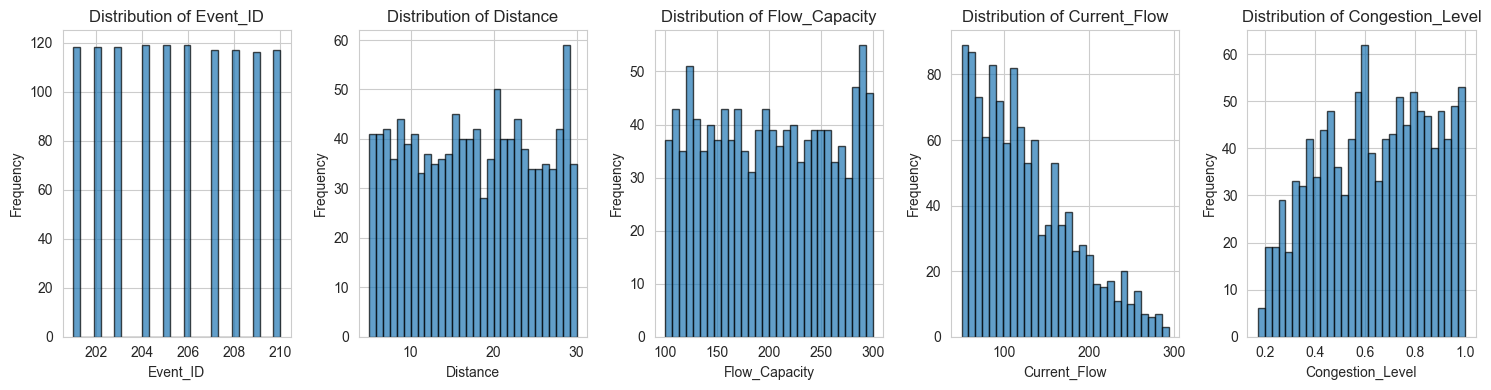

In [25]:
# Visualize distributions
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
print(f"\nNumerical columns: {numerical_cols}")

if numerical_cols:
    fig, axes = plt.subplots(1, len(numerical_cols), figsize=(15, 4))
    if len(numerical_cols) == 1:
        axes = [axes]

    for idx, col in enumerate(numerical_cols):
        axes[idx].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f"Distribution of {col}")
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

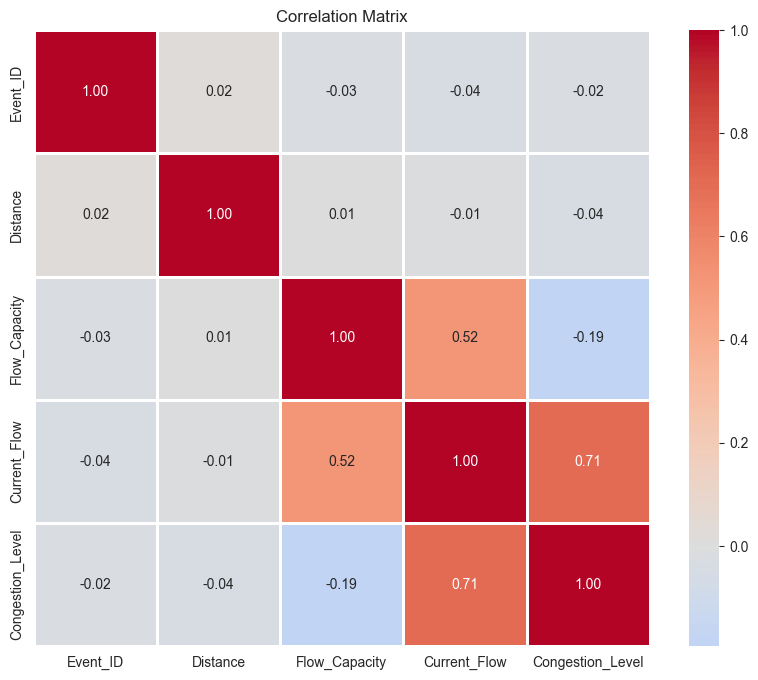


Correlation Matrix:
                  Event_ID  Distance  Flow_Capacity  Current_Flow  \
Event_ID          1.000000  0.024619      -0.028154     -0.039383   
Distance          0.024619  1.000000       0.009747     -0.011863   
Flow_Capacity    -0.028154  0.009747       1.000000      0.521016   
Current_Flow     -0.039383 -0.011863       0.521016      1.000000   
Congestion_Level -0.023569 -0.039746      -0.194471      0.707974   

                  Congestion_Level  
Event_ID                 -0.023569  
Distance                 -0.039746  
Flow_Capacity            -0.194471  
Current_Flow              0.707974  
Congestion_Level          1.000000  


In [26]:
# Correlation analysis
if len(numerical_cols) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                fmt='.2f', square=True, linewidths=1)
    plt.title("Correlation Matrix")
    plt.show()

    print("\nCorrelation Matrix:")
    print(correlation_matrix)

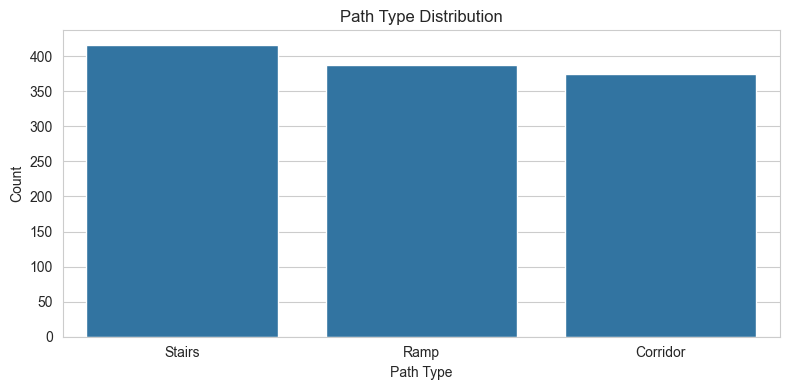

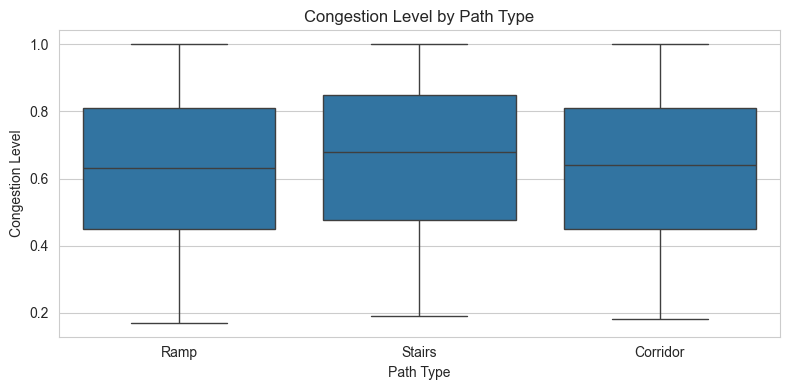

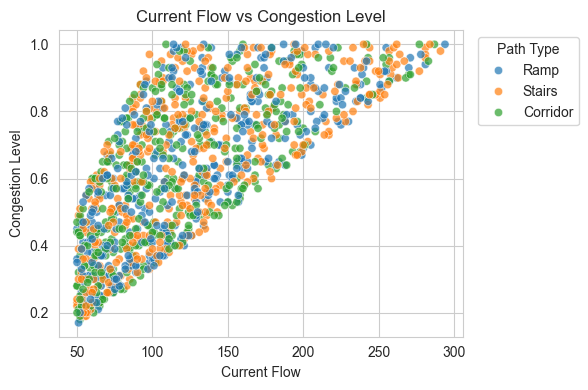

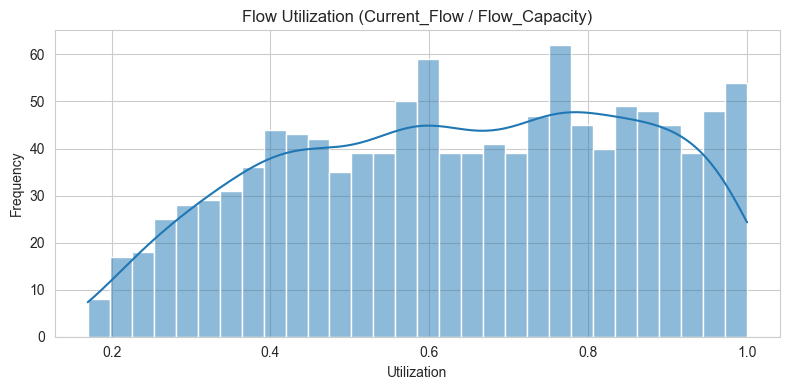

In [27]:
# Additional visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Path type distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Path_Type", order=df["Path_Type"].value_counts().index)
plt.title("Path Type Distribution")
plt.xlabel("Path Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Congestion level by path type
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="Path_Type", y="Congestion_Level")
plt.title("Congestion Level by Path Type")
plt.xlabel("Path Type")
plt.ylabel("Congestion Level")
plt.tight_layout()
plt.show()

# Flow vs congestion
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="Current_Flow", y="Congestion_Level", hue="Path_Type", alpha=0.7)
plt.title("Current Flow vs Congestion Level")
plt.xlabel("Current Flow")
plt.ylabel("Congestion Level")
plt.legend(title="Path Type", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Utilization ratio histogram
if "Flow_Capacity" in df.columns:
    utilization = df["Current_Flow"] / df["Flow_Capacity"]
    plt.figure(figsize=(8, 4))
    sns.histplot(utilization, bins=30, kde=True)
    plt.title("Flow Utilization (Current_Flow / Flow_Capacity)")
    plt.xlabel("Utilization")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()